# Gauss-Hermite Quadrature
## Efficient numerical integration method with weight function exp(-x^2)
## You need this for implementing Kennedy's method

There are two versions: 
* [Probabilists’ Gauss-Hermite module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.hermite_e.html):
integration weight is the standard normal PDF: exp(-x^2/2)

* [Physicists’ Gauss-Hermite module](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.hermite.html):
integration weight is exp(-x^2)

We mostly use __Probabilists’ Gauss-Hermite module__. You still need to devide the weight by sqrt(2*pi) for use with normal PDF

In [1]:
import numpy as np
import numpy.polynomial as nppoly
import scipy
import scipy.stats as ss
import scipy.special as spsp
import matplotlib.pyplot as plt

In [2]:
const = 1/np.sqrt(2.0*np.pi)

In [3]:
z, w = nppoly.hermite_e.hermegauss(deg=20)
w = w*const
print(z)
print(w)

[-7.61904854 -6.51059016 -5.57873881 -4.73458133 -3.94396735 -3.18901482
 -2.45866361 -1.74524732 -1.04294535 -0.34696416  0.34696416  1.04294535
  1.74524732  2.45866361  3.18901482  3.94396735  4.73458133  5.57873881
  6.51059016  7.61904854]
[1.25780067e-13 2.48206236e-10 6.12749026e-08 4.40212109e-06
 1.28826280e-04 1.83010313e-03 1.39978374e-02 6.15063721e-02
 1.61739334e-01 2.60793063e-01 2.60793063e-01 1.61739334e-01
 6.15063721e-02 1.39978374e-02 1.83010313e-03 1.28826280e-04
 4.40212109e-06 6.12749026e-08 2.48206236e-10 1.25780067e-13]


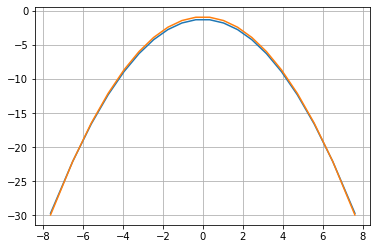

In [4]:
pdf = ss.norm.pdf(z)
plt.plot(z, np.log(w))
plt.plot(z, np.log(pdf))
plt.grid()
plt.show()

## Exact integration of polynomials with degree upto _2*deg-1_

In [5]:
z, w = nppoly.hermite_e.hermegauss(deg=3)
w = w*const
sum(w)

1.0

In [6]:
# Let's test on the moments of normal distribution
deg = np.array([2,4,6,8,10,12,14])
moments = [sum(z**2 * w), sum(z**4 * w), sum(z**6 * w), sum(z**8 * w), sum(z**10 * w), sum(z**12 * w), sum(z**14 * w)]
print(moments)

[0.9999999999999998, 2.9999999999999996, 9.0, 27.000000000000004, 81.00000000000003, 243.00000000000009, 729.0000000000005]


In [7]:
# luckily we know the exact answer: (2*deg-1)!! 
spsp.factorial2([1,3,5,7,9,11,13])

array([1.00000e+00, 3.00000e+00, 1.50000e+01, 1.05000e+02, 9.45000e+02,
       1.03950e+04, 1.35135e+05])

In [8]:
# Find out upto which degree integration is correct
deg[np.abs(moments - spsp.factorial2([1,3,5,7,9,11,13])) < 0.1 ]

array([2, 4])

# Overall GHQ is very accurate for integrating smooth functions

Let's test on Geometric Brownian Motion:

$ S_T = S_0 exp\left(\sigma\sqrt{T} z - \frac12 \sigma^2 T\right)$

In [9]:
spot = 100
texp = 2
vol = 0.2

In [10]:
z = np.linspace(-5,5,10)
price = spot * np.exp(vol*np.sqrt(texp)*z - 0.5*vol*vol*texp)
print(price)

[ 23.35839909  31.983697    43.79396334  59.96527623  82.10799112
 112.42710165 153.94181507 210.78620794 288.6209016  395.19675245]


In [11]:
# Let's check the expectation of the prices are same as 100 (assuming 0 interest rate)
z, w = nppoly.hermite_e.hermegauss(deg=10)
w = w*const
price = spot * np.exp(vol*np.sqrt(texp)*z - 0.5*vol*vol*texp)
price_mean = sum(price * w)
price_mean - 100

-1.4210854715202004e-14

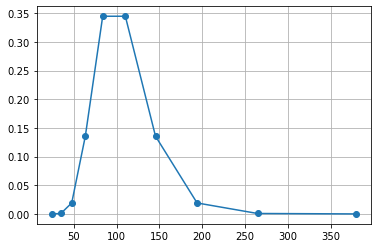

In [12]:
plt.plot(price, w, 'o-')
plt.grid()
plt.show()

## Gauss-general Laguerre quadrature.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_genlaguerre.html

In [13]:
scale = 1
n_quad = 10
x, w = spsp.roots_genlaguerre(n_quad, alpha=2)

x *= scale
w /= w.sum()
x, w

(array([ 0.57631386,  1.55934346,  3.00371036,  4.94201907,  7.42270711,
        10.51881998, 14.34451459, 19.09178003, 25.13064781, 33.41014374]),
 array([7.09984698e-02, 3.09139688e-01, 3.77000902e-01, 1.91804921e-01,
        4.56552110e-02, 5.13852388e-03, 2.57313277e-04, 4.94361316e-06,
        2.65699602e-08, 1.75587516e-11]))

## Gauss-Legendre quadrature.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_legendre.html

In [14]:
scale = 1
n_quad = 10
x, w = spsp.roots_legendre(n_quad)

x *= scale
w /= w.sum()
x, w

(array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
         0.14887434,  0.43339539,  0.67940957,  0.86506337,  0.97390653]),
 array([0.03333567, 0.07472567, 0.10954318, 0.13463336, 0.14776211,
        0.14776211, 0.13463336, 0.10954318, 0.07472567, 0.03333567]))

# Gauss-Jacobi Quadrature

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.roots_jacobi.html

In [15]:
scale = 1
n_quad = 10
x, w = spsp.roots_jacobi(n_quad, alpha=1, beta=1.5)

x *= scale
w /= w.sum()
x, w

(array([-0.92758001, -0.79101274, -0.59842537, -0.36348091, -0.10287083,
         0.16488663,  0.42076434,  0.64657859,  0.82627988,  0.94708264]),
 array([0.00305011, 0.02204033, 0.06805619, 0.13428174, 0.19377731,
        0.21515904, 0.18491321, 0.11850472, 0.05042276, 0.00979459]))